In [25]:
import PIL.Image as image
import numpy as np
import cv2
from copy import copy

kernel = {
        'average blur': np.array([
            [1.0, 1.0, 1.0],
            [1.0, 1.0, 1.0],
            [1.0, 1.0, 1.0]],np.float32)/9,
        'gaussian blur': np.array([
            [1.0, 2.0, 1.0],
            [2.0, 4.0, 2.0],
            [1.0, 2.0, 1.0]],np.float32)/16,
        'sobel ver': np.array([
            [1.0,0.0,-1.0],
            [2.0,0.0,-2.0],
            [1.0,0.0,-1.0]],np.float32),
        'sobel hor': np.array([
            [1.0,2.0,1.0],
            [0.0,0.0,0.0],
            [-1.0,-2.0,-1.0]],np.float32),
        'laplacian': np.array([
            [0.0, 1.0, 0],
            [1.0, -4, 1.0],
            [0, 1.0, 0.0]],np.float32),
        'sharpen': np.array([
            [-1,-1, -1],
            [-1, 9, -1],
            [-1, -1, -1]],np.float32),
}

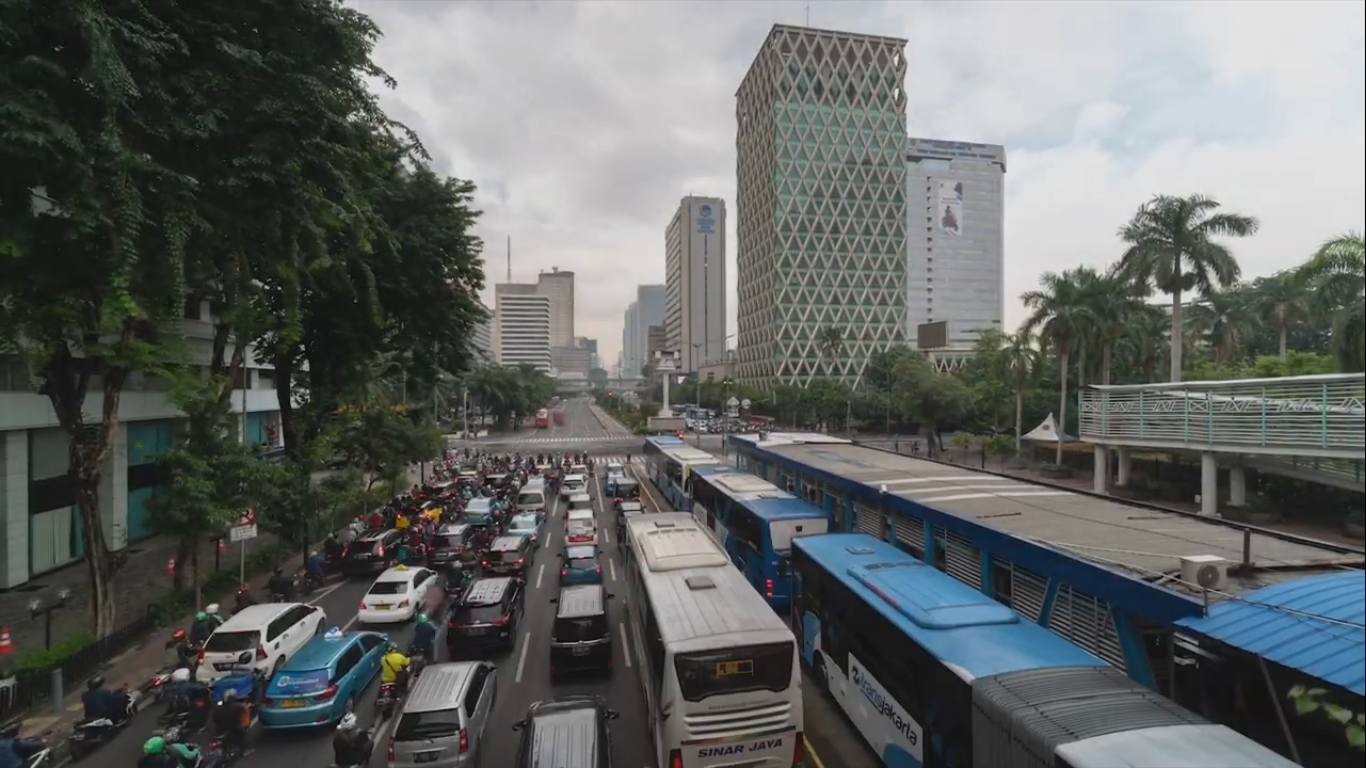

In [29]:
image_name = "input1"
filename = f"input-image/{image_name}.png"
img = image.open(filename).convert('L')
arr = np.array(img)

image.open(filename)

### Save Grayscale Image

In [30]:
grayscale = image.fromarray(arr)
grayscale.save(f"output-image/{image_name}-grayscale.png")

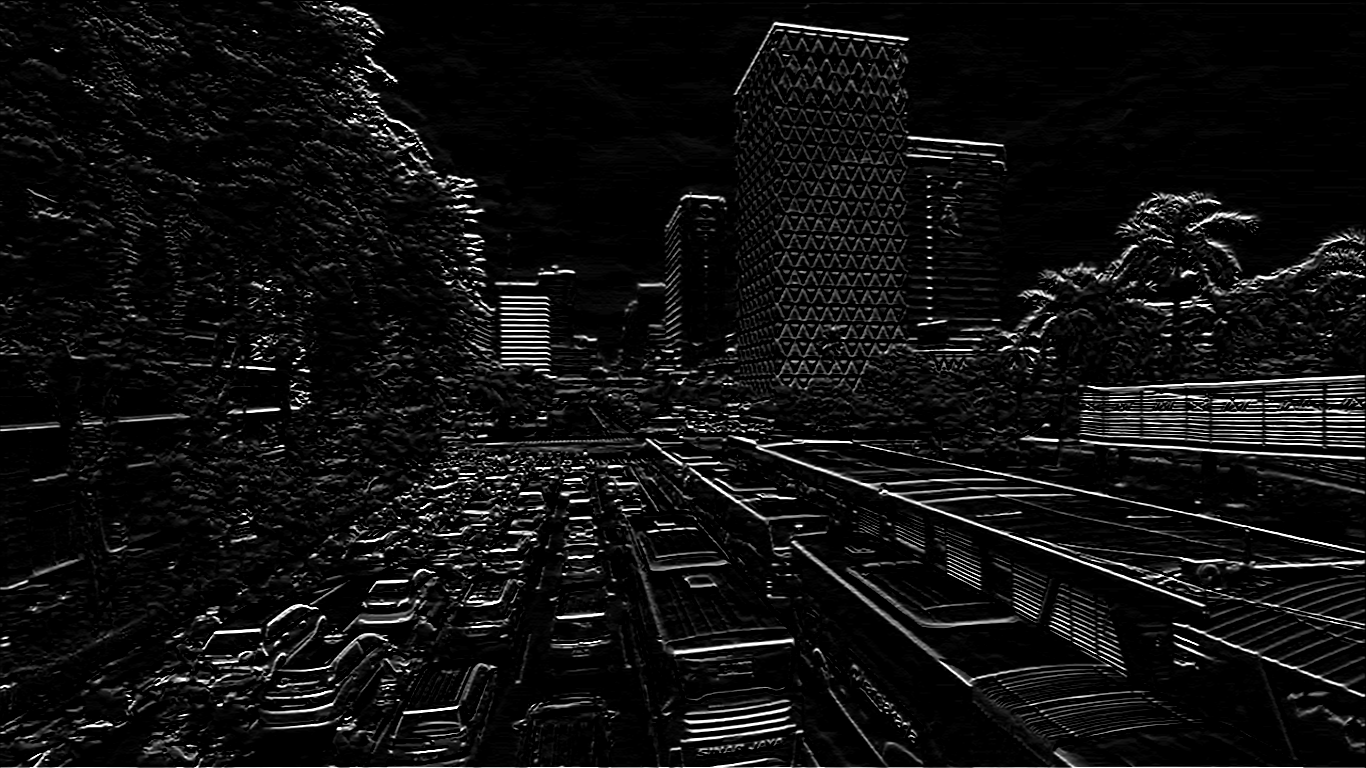

In [35]:
kernel_name = 'sobel hor'
filename_output = f"output-image/{image_name}-"+kernel_name+".png"

inframe = copy(arr)
outframe = copy(arr)

cv2.filter2D(inframe, -1, kernel.get(kernel_name), dst=outframe, borderType=cv2.BORDER_CONSTANT) #filter2D on ARM

image.fromarray(outframe)

### Save Output Image

In [36]:
output_image = image.fromarray(outframe)
output_image.save(filename_output)

In [46]:
def run_filter(img_name):
    image_name = img_name
    filename = f"input-image/{image_name}.png"
    img = image.open(filename).convert('L')
    arr = np.array(img)
    
    # Save Grayscale
    img.save(f"output-image/{image_name}-grayscale.png")
    
    for k_name in kernel:
        kernel_name = k_name
        filename_output = f"output-image/{image_name}-"+kernel_name+".png"

        inframe = copy(arr)
        outframe = copy(arr)
        cv2.filter2D(inframe, -1, kernel.get(kernel_name), dst=outframe, borderType=cv2.BORDER_CONSTANT) #filter2D on ARM
        
        # Save Output Image
        output_image = image.fromarray(outframe)
        output_image.save(filename_output)

In [43]:
for i in range(1,7):
    print(i)

1
2
3
4
5
6


In [47]:
run_filter("input2")